## Código para testar o modelo de YOLO

---

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from paddleocr import PaddleOCR
import os

In [6]:
def classify_image(image_path):    
    model = YOLO('last.pt')  
    results = model(image_path)
    
    # Display results
    for result in results:
        img_rgb = cv2.cvtColor(result.plot(show=False), cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

def classify_and_crop(image_path):
    # Load model
    model = YOLO('last.pt')
    
    # Run inference
    results = model(image_path)
    
    # Read the original image
    original_image = cv2.imread(image_path)
    imgnames = []


    # Iterate over results
    for i, result in enumerate(results):
        boxes = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes in (x1, y1, x2, y2) format

        for j, (x1, y1, x2, y2) in enumerate(boxes):
            # Convert coordinates to integers
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

            # Crop the image
            cropped = original_image[y1:y2, x1:x2]

            # Convert BGR to RGB for displaying
            cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
            # Save the cropped image
            output_filename = f'cropped_{i}_{j}.jpeg'
            imgnames.append(output_filename)
            cv2.imwrite(output_filename, cropped)

            # Show the cropped region
            plt.figure(figsize=(4, 4))
            plt.imshow(cropped_rgb)
            plt.axis('off')
            plt.title(f'Cropped #{i}-{j}')
            plt.show()
    return imgnames


image 1/1 /home/joao/Documents/VisComp/compvis-car/carro.jpeg: 640x480 3 License_Plates, 63.9ms
Speed: 3.6ms preprocess, 63.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


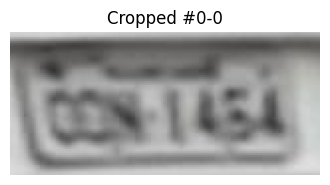

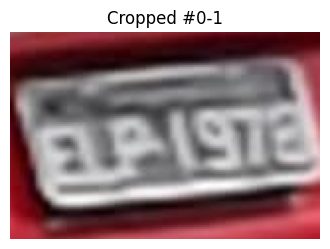

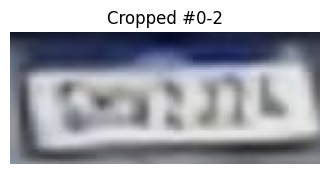

In [7]:
image_path = 'carro.jpeg'
imgs = classify_and_crop(image_path)

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, lang='en', show_log=False)
for img in imgs:
    result = ocr.ocr(img, cls=True)
    # Print the results
    for line in result:
        for word_info in line:
            word = word_info[1][0]
            confidence = word_info[1][1]
            if word.lower() != "brasil":
                print(f"Detected text: {word}, Confidence: {confidence:.2f}")
    
    os.remove(img)

Detected text: 1971-N00, Confidence: 0.62
Detected text: EP-1978, Confidence: 0.74
Detected text: EanL, Confidence: 0.57



image 1/1 /home/joao/Documents/VisComp/compvis-car/carro2.jpeg: 480x640 2 License_Plates, 64.8ms
Speed: 4.1ms preprocess, 64.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


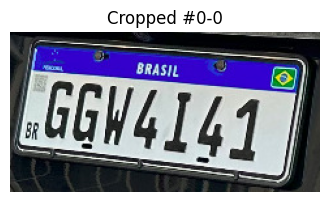

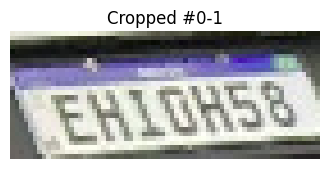

In [9]:
image_path = 'carro2.jpeg'
imgs = classify_and_crop(image_path)

In [ ]:
for img in imgs:
    result = ocr.ocr(img, cls=True)
    # Print the results
    for line in result:
        for word_info in line:
            word = word_info[1][0]
            confidence = word_info[1][1]
            if word.lower() != "brasil":
                print(f"Detected text: {word}, Confidence: {confidence:.2f}")
    
    os.remove(img)

Detected text: BRASIL, Confidence: 0.98
Detected text: GGW4141, Confidence: 0.98
Detected text: EHIOH58, Confidence: 0.77
